In [1]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

scrapping

In [2]:
consumer_key = "H1HAPkY6BsUBotSMtizThA7NP" 
consumer_secret = "6HMb84I01d4vCa9h7BpPtU79z3sk0vYVZfPH8R9ZjUjpGje8QJ"
access_key = "1269208732174626817-5Hfcb4CTMzVRJsSTa3cRtJm7ovC3Td"
access_secret = "xDLhzGKiVG3YWyvz8E5Rz6nChnC6XtpbotJoN8ftwVV4Q"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)




In [4]:
tweets = tw.Cursor(api.search,
              q="hate",
              lang="en",
              since="2020-05-1").items(10)


for tweet in tweets:
    print(tweet.text)
  
    
    

RT @Aintshitjunior: i hate humans bro .. i shouldve been a bike or some shit
RT @Aintshitjunior: i hate humans bro .. i shouldve been a bike or some shit
I'm starting to hate wishes.
RT @Aintshitjunior: i hate humans bro .. i shouldve been a bike or some shit
RT @sopheanordin: Honestly I prefer not to be around people when I’m not in the mood, because I hate the fact that I can’t control my words…
RT @DearSplenda: why don't all the conservatives who hate unions also hate police unions
RT @1luv95: I hate being shy like this shit be embarassing sometimes https://t.co/jIlrsvTFgv
RT @icecube: Over half of the U.S. Senate doesn’t think this is a Hate Crime. Guess which half? https://t.co/hbLZC6IoNT
RT @wafilahh: hate the sin, not the sinner. look at the advice, not the adviser.
RT @localblackgirl: i hate this. it screams “i’m allowed to fetishize black men because i’m out here supporting them” 😐


In [5]:
tweets = tw.Cursor(api.search,
              q="hate",
              lang="en",
              since="2020-05-1").items(500)
info = [[tweet.text] for tweet in tweets]

tweet_text = pd.DataFrame(data=info, 
                    columns=["tweet"])
tweet_text

,tweet
0,RT @Aintshitjunior: i hate humans bro .. i sho...
1,RT @Aintshitjunior: i hate humans bro .. i sho...
2,I'm starting to hate wishes.
3,RT @Aintshitjunior: i hate humans bro .. i sho...
4,RT @sopheanordin: Honestly I prefer not to be ...
...,...
495,RT @ThatTimWalker: Let’s never forget what a m...
496,RT @icecube: Over half of the U.S. Senate does...
497,RT @Aintshitjunior: i hate humans bro .. i sho...
498,kalat content ⚠️⚠️⚠️ xjdhshshs because i fucki...


In [6]:
import re
import nltk

cleaning text

In [7]:
def remove(input_txt, pattern):                                          
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove)(lst, "\r")                                  
    lst = np.vectorize(remove)(lst, "\n")
    lst = np.vectorize(remove)(lst, "RT @[\w]*:")                        
    lst = np.vectorize(remove)(lst, "@[\w]*")                             
    lst = np.vectorize(remove)(lst, "https?://[A-Za-z0-9./]*")           
    return lst

In [8]:
tweet_text['clean']= clean_tweets(tweet_text['tweet'])   #Cleaned Tweets are kept in separate coloumn clean

In [9]:
tweet_text.head()

,tweet,clean
0,RT @Aintshitjunior: i hate humans bro .. i sho...,i hate humans bro .. i shouldve been a bike o...
1,RT @Aintshitjunior: i hate humans bro .. i sho...,i hate humans bro .. i shouldve been a bike o...
2,I'm starting to hate wishes.,I'm starting to hate wishes.
3,RT @Aintshitjunior: i hate humans bro .. i sho...,i hate humans bro .. i shouldve been a bike o...
4,RT @sopheanordin: Honestly I prefer not to be ...,Honestly I prefer not to be around people whe...


In [10]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
tweet_text['clean'].apply(tt.tokenize)

0      [i, hate, humans, bro, .., i, shouldve, been, ...
1      [i, hate, humans, bro, .., i, shouldve, been, ...
2                   [I'm, starting, to, hate, wishes, .]
3      [i, hate, humans, bro, .., i, shouldve, been, ...
4      [Honestly, I, prefer, not, to, be, around, peo...
                             ...                        
495    [Let, ’, s, never, forget, what, a, miserable,...
496    [Over, half, of, the, U, ., S, ., Senate, does...
497    [i, hate, humans, bro, .., i, shouldve, been, ...
498    [kalat, content, ⚠, ️, ⚠, ️, ⚠, ️, xjdhshshs, ...
499                             [spread, luv, not, hate]
Name: clean, Length: 500, dtype: object

In [11]:
info1=tweet_text['clean'].apply(tt.tokenize)

In [12]:
df=pd.DataFrame(data=info1,columns=["clean"])
df

,clean
0,"[i, hate, humans, bro, .., i, shouldve, been, ..."
1,"[i, hate, humans, bro, .., i, shouldve, been, ..."
2,"[I'm, starting, to, hate, wishes, .]"
3,"[i, hate, humans, bro, .., i, shouldve, been, ..."
4,"[Honestly, I, prefer, not, to, be, around, peo..."
...,...
495,"[Let, ’, s, never, forget, what, a, miserable,..."
496,"[Over, half, of, the, U, ., S, ., Senate, does..."
497,"[i, hate, humans, bro, .., i, shouldve, been, ..."
498,"[kalat, content, ⚠, ️, ⚠, ️, ⚠, ️, xjdhshshs, ..."


In [13]:
from textblob import TextBlob

In [14]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [15]:
nltk.download('wordnet')                                                                   #words to base form
df['clean'] = df['clean'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['clean'].head(10)

[nltk_data] Downloading package wordnet to C:\Users\Neha
[nltk_data]     Shinkre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    i hate human bro .. i shouldve been a bike or ...
1    i hate human bro .. i shouldve been a bike or ...
2                          I'm starting to hate wish .
3    i hate human bro .. i shouldve been a bike or ...
4    Honestly I prefer not to be around people when...
5    why don't all the conservative who hate union ...
6    I hate being shy like this shit be embarassing...
7    Over half of the U . S . Senate doesn ’ t thin...
8    hate the sin , not the sinner . look at the ad...
9    i hate this . it scream “ i ’ m allowed to fet...
Name: clean, dtype: object

In [16]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer     #try

#nltk.download('vader_lexicon')
#sid = SentimentIntensityAnalyzer()
#for sentence in tweet_text["clean"]:
 #   print(sentence)
  #  ss = sid.polarity_scores(sentence)
   # for k in ss:
        #print('{0}: {1}, '.format(k, ss[k]), end='') 
    #print()


In [17]:
from textblob import TextBlob                                               #polarrity -:negative +:positive &subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['clean'].apply(polarity)
df['subjectivity'] = df['clean'].apply(subjectivity)


In [18]:
df


,clean,polarity,subjectivity
0,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000
1,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000
2,I'm starting to hate wish .,-0.400000,0.500000
3,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000
4,Honestly I prefer not to be around people when...,-0.100000,0.900000
...,...,...,...
495,Let ’ s never forget what a miserable hate-fil...,-1.000000,1.000000
496,Over half of the U . S . Senate doesn ’ t thin...,-0.377778,0.411111
497,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.600000
498,kalat content ⚠ ️ ⚠ ️ ⚠ ️ xjdhshshs because i ...,-0.441667,0.658333


In [19]:
def ratio(x):                                                              #0 neutral 1:pos -1:neg
 if x > 0:
   return 1
 elif x == 0:
   return 0
 else:
   return -1
df['result'] = df['polarity'].apply(ratio)

In [20]:
df.head()

,clean,polarity,subjectivity,result
0,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.6,-1
1,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.6,-1
2,I'm starting to hate wish .,-0.400000,0.5,-1
3,i hate human bro .. i shouldve been a bike or ...,-0.333333,0.6,-1
4,Honestly I prefer not to be around people when...,-0.100000,0.9,-1


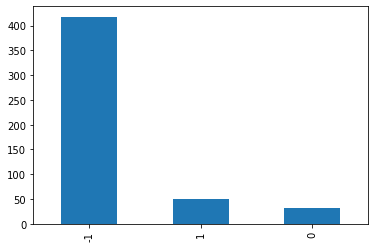

In [21]:
df['result'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
#0:neither 1:non-toxic -1:toxic(negative tweets)